In [1]:
import requests
import json
import pandas as pd

In [3]:
USER_AGENT = 'Kieske'
API_KEY = '4d42f983ebfbfd63f1c7b11bd361f439'

In [5]:
headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'method': 'chart.gettopartists',
    'format': 'json'
}

r = requests.get('http://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [5]:
import requests
import json

API_KEY = 'e7dc591c-e001-46c1-854d-03fca4ea0349'


In [6]:
payload = {
    
}
r = requests.get('https://tiles.stadiamaps.com/static/outdoors', params=payload)
r.status_code


NameError: name 'payload' is not defined

In [6]:
def getlastfm(payload):
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

In [7]:
r = getlastfm({
    'method': 'chart.gettopartists'
})
r.status_code

200

In [13]:
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

In [14]:
jprint(r.json())

{
    "artists": {
        "@attr": {
            "page": "1",
            "perPage": "50",
            "total": "4650565",
            "totalPages": "93012"
        },
        "artist": [
            {
                "image": [
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "small"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "medium"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "large"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "si

In [16]:
jprint(r.json()['artists']['@attr'])

{
    "page": "1",
    "perPage": "50",
    "total": "4650565",
    "totalPages": "93012"
}


In [18]:
from IPython.display import clear_output
import time

In [20]:
results = []
page = 1
total_pages = 1000

while page < total_pages:
    payload = {
        'method': 'chart.gettopartists',
        'limit': 500,
        'page': page
    }

    print('Requesting page {}/{}'.format(page, total_pages))
    clear_output(wait=True)

    response = getlastfm(payload)

    results.append(response)

    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)
    page += 1



Requesting page 999/1000


In [21]:
r0 = results[0]
r0_json = r0.json()
r0_artists = r0_json['artists']['artist']
r0_df = pd.DataFrame(r0_artists)
r0_df.head(10)


,name,playcount,listeners,mbid,url,streamable,image
0,The Weeknd,464600296,3258259,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Taylor Swift,1330779016,3949689,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,"Tyler, the Creator",375610694,2299658,f6beac20-5dfe-4d1f-ae02-0b0a740aafd6,"https://www.last.fm/music/Tyler,+the+Creator",0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,SZA,201589182,1869488,272989c8-5535-492d-a25c-9f58803e027f,https://www.last.fm/music/SZA,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Kendrick Lamar,378345000,2994765,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Kanye West,762430199,5986946,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Lana Del Rey,637345666,3383535,b7539c32-53e7-4908-bda3-81449c367da6,https://www.last.fm/music/Lana+Del+Rey,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Drake,463102990,4936811,b49b81cc-d5b7-4bdd-aadb-385df8de69a6,https://www.last.fm/music/Drake,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Arctic Monkeys,534651771,5023000,ada7a83c-e3e1-40f1-93f9-3e73dbc9298a,https://www.last.fm/music/Arctic+Monkeys,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Rihanna,319559666,6120799,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [ ]:
#Setup Environment
import pandas as pd
import psycopg2
import sqlalchemy
import csv
import os
from IPython.display import display, HTML
%load_ext sql

#Connect to SQL database
connect_url = 'postgresql://{}:{}@{}:{}/{}'.format(user,password,host,port,db)
engine = sqlalchemy.create_engine(connect_url)
%sql $connect_url
%config SqlMagic.displaycon = False

In [ ]:
#Read multiple CSV files and load into SQL database
import glob 
import os
file_names = glob.glob('data/*.csv')

for names in file_names:
    tablename = os.path.basename(names)
    tablename, ext = os.path.splitext(tablename)
    df = pd.read_csv(names)
    df.columns = df.columns.str.lower() #convert column names to lower case
    df.to_sql(tablename, engine, if_exists='replace', index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets

chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

<Axes: >

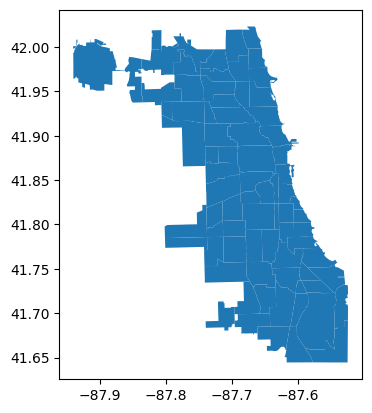

In [3]:
chicago.plot()

In [8]:
chicago

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,74,19093,18820,273,1.450584,1,0,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,75,22544,25226,-2682,-10.631888,0,1,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,76,12756,11956,800,6.691201,1,0,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,77,56521,62198,-5677,-9.127303,0,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [10]:
chicago.geometry

0     MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...
1     MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...
2     MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...
3     MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...
4     MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...
                            ...                        
72    MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...
73    MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...
74    MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...
75    MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...
76    MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...
Name: geometry, Length: 77, dtype: geometry